# CLASSIFICATION PROBLEM

# INTRODUCTION

We have a data which classify the patients whether they have a heart disease or not according to features in it. We will try to use this data to create a model which predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

In [322]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Read data

In [323]:
data= pd.read_csv(r"C:\Users\shilp\Downloads\heart.csv")

In [324]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

In [325]:
#to check number of rows and columns
data.shape

(303, 14)

In [326]:
#name of columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Data Exploration

In [327]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

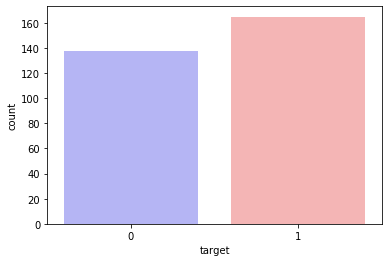

In [328]:
sns.countplot(x="target", data=data, palette="bwr")


In [329]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients not have Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients not have Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


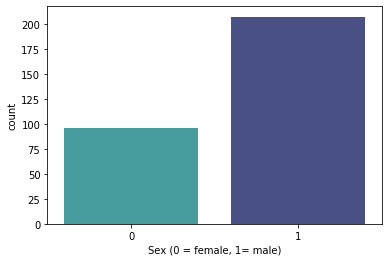

In [330]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [331]:

data.sex.value_counts()         #0-female and 1-male

1    207
0     96
Name: sex, dtype: int64

In [332]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [333]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [334]:
c=pd.crosstab(data.age,data.target)
c

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


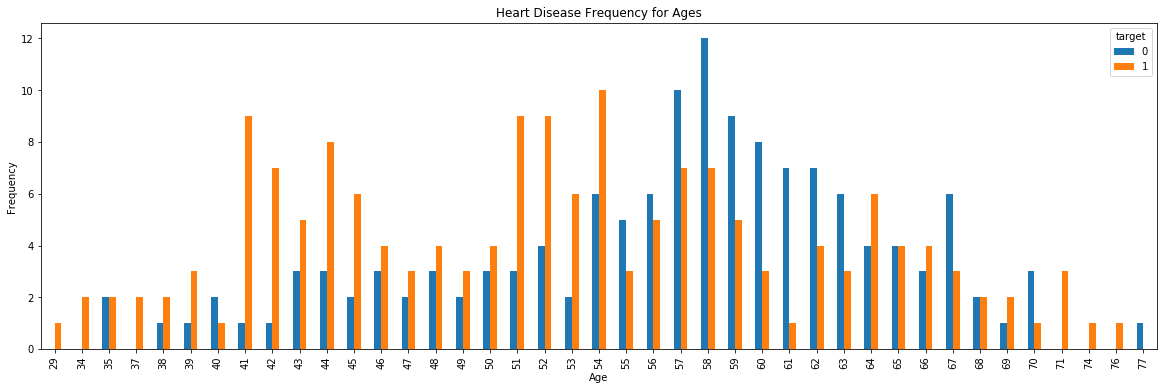

In [335]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [336]:
pd.crosstab(data.sex,data.target)

target,0,1
sex,,
0,24,72
1,114,93


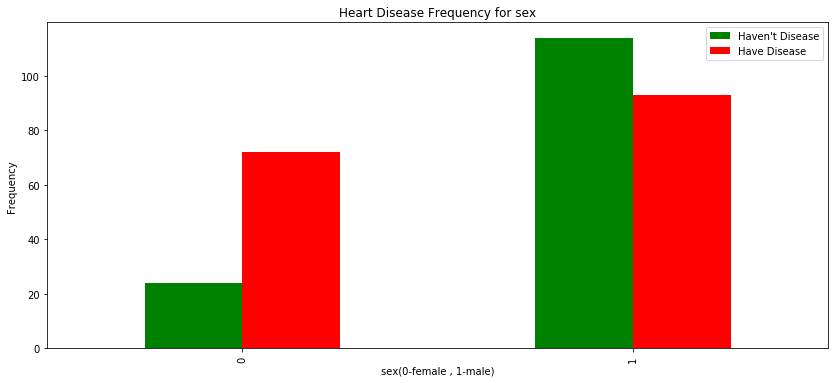

In [337]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(14,6),color=["green","red"])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('sex(0-female , 1-male)')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

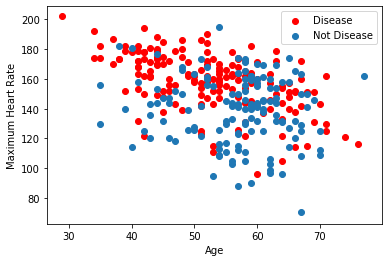

In [338]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

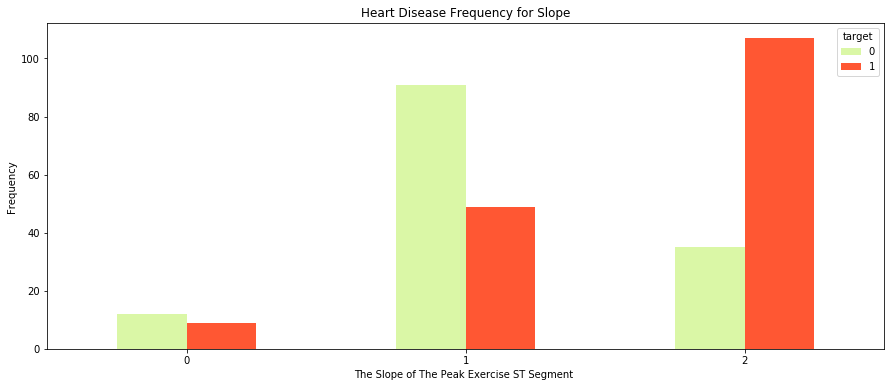

In [339]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

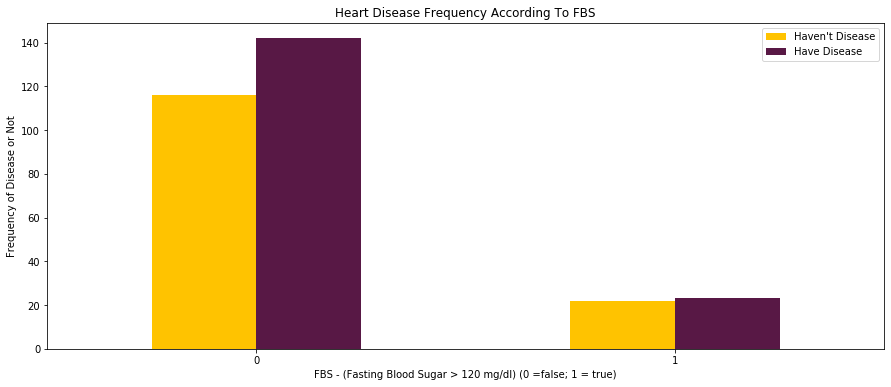

In [340]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (0 =false; 1 = true)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

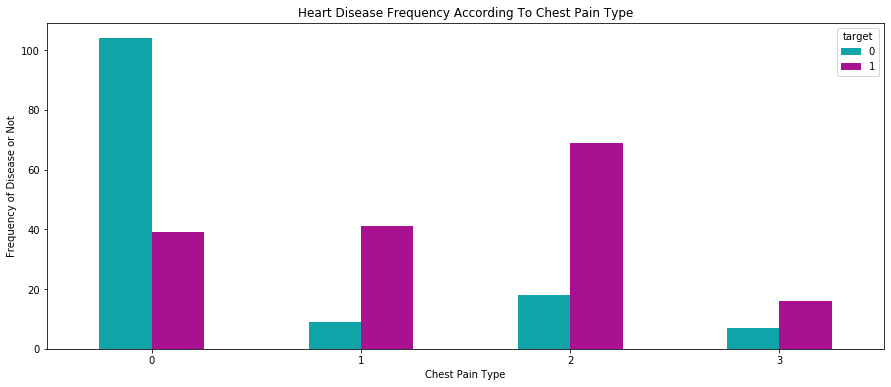

In [341]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [342]:
#checking for null values

In [343]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [344]:
#there are no null values from above information 

In [345]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


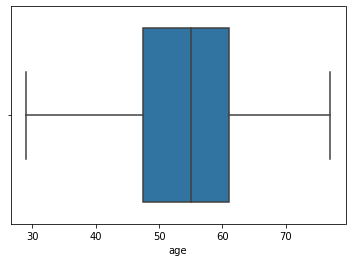

In [346]:
sns.boxplot(data["age"])

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [348]:
data1=data.copy()

In [349]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [350]:
frames=[data,a,b,c]
data1=pd.concat(frames,axis=1)
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [351]:
data1=data1.drop(columns=["cp","thal","slope"])
data1.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Creating Model for Logistic Regression

We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [352]:
y = data["target"]
x_data = data1.drop(['target'], axis = 1)

### Normalize Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [353]:
# Normalize
def normalise(x_data):
    '''
    normalise the data
    '''
    x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
    return x

x=normalise(x_data)
x.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [354]:
# adding one more column in x whose elements are all one for the bias variable as a first column in  x

In [355]:
x= np.hstack((np.matrix(np.ones(x.shape[0])).T, x))
print(x.shape)
x

(303, 22)


matrix([[1.        , 0.70833333, 1.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.16666667, 1.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.25      , 0.        , ..., 0.        , 0.        ,
         1.        ],
        ...,
        [1.        , 0.8125    , 1.        , ..., 0.        , 1.        ,
         0.        ],
        [1.        , 0.58333333, 1.        , ..., 0.        , 1.        ,
         0.        ],
        [1.        , 0.58333333, 0.        , ..., 0.        , 1.        ,
         0.        ]])

# splitting data
We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [356]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### initialise a matrix beta with order(1*(no of columns in x) )

In [413]:
beta = np.matrix(np.ones(x_train.shape[1]))

beta

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1.]])

In [358]:
def logistic_func(beta, X): 
    ''' 
    logistic(sigmoid) function 
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 
  

In [359]:
def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    
    '''
    import pandas as pd
    import numpy as np
    y2=pd.DataFrame(y)
    y2=np.array(y2)
    import numpy as np
    y=np.array(y)
    first_calc = logistic_func(beta, X) - y2
    final_calc = np.dot(first_calc.T, X) 
    return final_calc

In [360]:
def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    import numpy as np
    y=np.array(y)
    log_func_v = logistic_func(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return final.sum() 

In [361]:
def grad_desc(X, y, beta, lr, converge_change): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    
    num_iter = 1
      
    while(cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        cost 
        num_iter += 1
      
    return beta, num_iter  
  


In [362]:
def pred_values(beta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .35, 1, 0) 
    return np.squeeze(pred_value) 

In [363]:
def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    import matplotlib.pyplot as plt 
    import numpy as np
    import pandas as pd
    y=np.array(y)
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
      

In [414]:
beta

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1.]])

In [415]:
cost_func(beta,x_train,y_train)

903.2569194392389

In [416]:
beta, num_iter = grad_desc(x_train,y_train, beta,0.01,300) 

In [417]:
print("beta: \n",beta)
print("number of iterations: ",num_iter)

beta: 
 [[-1.09552854 -0.22364433 -0.77577693  0.19516103  0.40323     0.62766596
   0.49781933 -0.0905465  -0.19648884  0.4476472   0.34943026 -0.60043595
   0.87289374  0.74578644  0.88622723  0.98070232  0.76583189  0.48075303
  -0.32281577  0.82435263 -0.331956    0.41207484]]
number of iterations:  3


In [418]:
cost_func(beta,x_train,y_train)

148.75676220887607

In [419]:
beta, num_iter = grad_desc(x_train,y_train, beta,0.01,81) 

In [420]:
print("beta: \n",beta)
print("number of iterations: ",num_iter)

beta: 
 [[ 0.14650084 -0.22234086 -1.63256517 -1.2354732  -1.58280843 -0.22348552
   0.44536563  2.29462203 -0.75851486 -2.69226828 -3.73192707 -0.34400726
   0.55933515  1.52144324  1.40972971  0.33065219  1.12977555  1.52255469
   0.16351841  1.03211944  0.27748272  0.83689868]]
number of iterations:  471


In [421]:
cost_func(beta,x_train,y_train)


80.99971853645182

#### predicting the values of xtest

In [423]:
y_pred=pred_values(beta,x_test)

In [424]:
c=pd.DataFrame(y_test)

In [425]:
c["pred"]=y_pred

In [427]:
c

,target,pred
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
245,0,0
175,0,0
168,0,0
223,0,0
217,0,0


In [434]:
pd.crosstab(c.target,c.pred)

pred,0,1
target,,
0,21,6
1,2,32


In [435]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [436]:
result=confusion_matrix(y_test,y_pred)

In [437]:
result

array([[21,  6],
       [ 2, 32]], dtype=int64)

In [438]:
acc_score=accuracy_score(y_test,y_pred)

In [439]:
acc_score

0.8688524590163934

## Model accuracy is 86.885%